In [4]:
# load necessary libraries
library(DBI)
library(corrgram)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [5]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

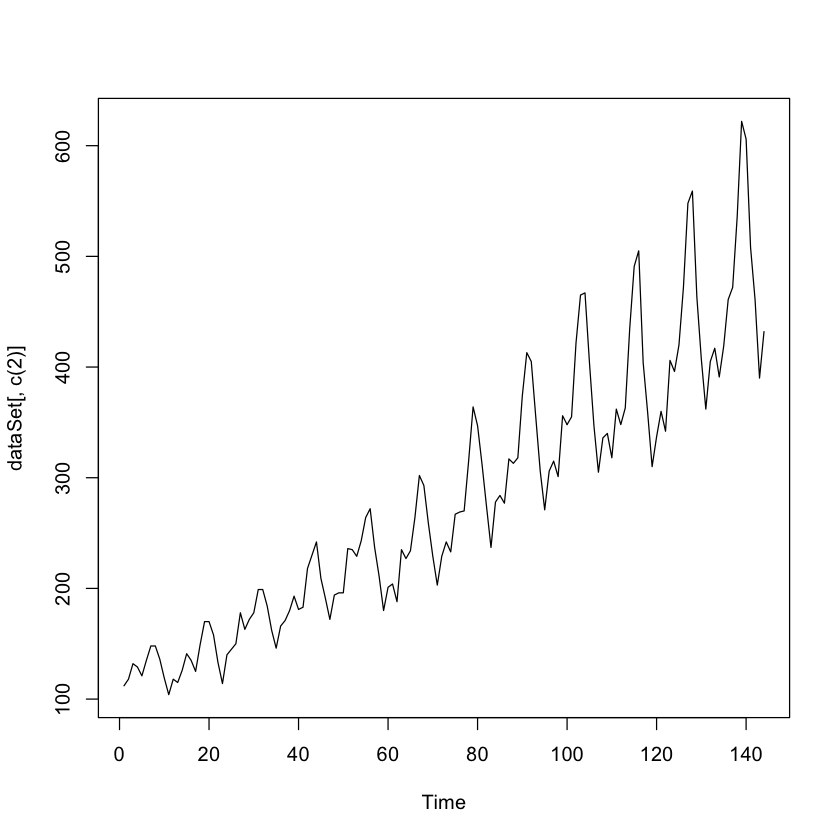

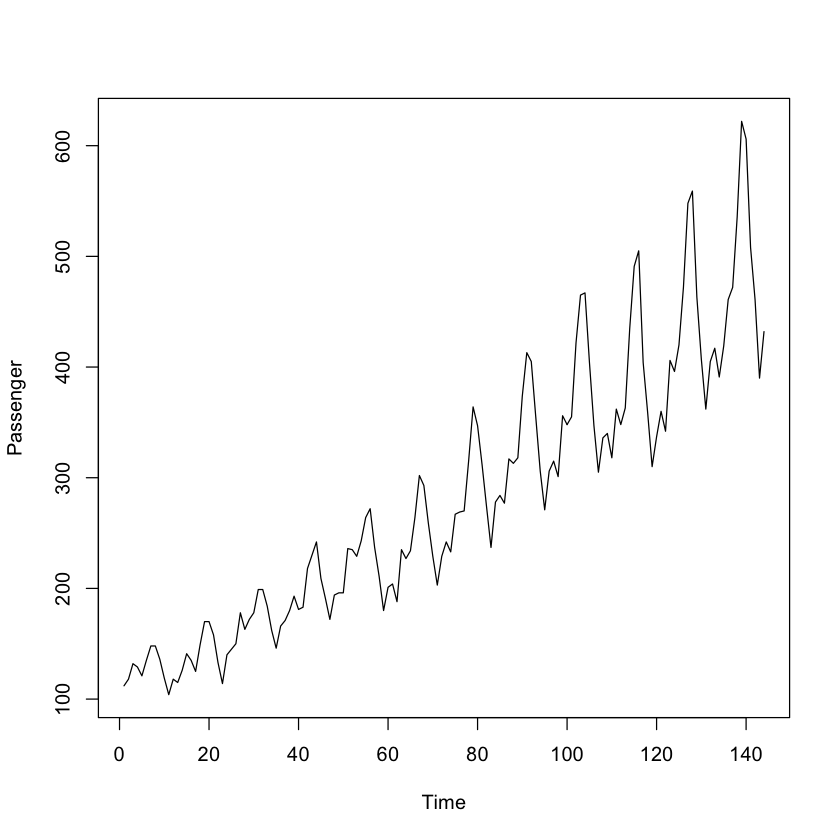

In [6]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [7]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

# Create "x" variable as row numbers / names
names(dataSet) <- 1:length(dataSet)

df <- cbind(read.table(text = names(dataSet)), dataSet)
x = df$V1; y = df$dataSet

In [8]:
# Define the model: y ~ log(x)
Model  = lm(y ~ log(x))

# Summarise the fitted model 
summary(Model)


Call:
lm(formula = y ~ log(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-108.71  -49.08  -18.28   40.24  247.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -119.022     27.056  -4.399 2.12e-05 ***
log(x)        99.994      6.595  15.162  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.39 on 142 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6155 
F-statistic: 229.9 on 1 and 142 DF,  p-value: < 2.2e-16


In [9]:
# Summarise the r_squared for actual and fitted data 
summary(Model)$r.squared; r2 <- cor(fitted(Model), y)^2; print(r2)

[1] 0.618174

[1] 0.618174


In [10]:
# Generate the equation
paste('y =', coef(Model)[[2]], '* log(x)', '+',  coef(Model)[[1]])

# Generate the trendline and fitted values
tendency  =  coef(Model)[[2]]  * log(x) + coef(Model)[[1]];  print(tendency)

[1] "y = 99.9938545963756 * log(x) + -119.02236070685"

  [1] -119.022361  -49.711902   -9.167883   19.598556   41.911540   60.142575
  [7]   75.556696   88.909014  100.686594  111.221998  120.752431  129.453034
 [13]  137.456812  144.867154  151.766017  158.219473  164.281562  169.997053
 [19]  175.403442  180.532457  185.411173  190.062889  194.507792  198.763492
 [25]  202.845440  206.767271  210.541072  214.177613  217.686529  221.076476
 [31]  224.355257  227.529931  230.606908  233.592021  236.490596  239.307511
 [37]  242.047240  244.713901  247.311290  249.842915  252.312025  254.721632
 [43]  257.074537  259.373347  261.620495  263.818250  265.968739  268.073950
 [49]  270.135752  272.155899  274.136040  276.077729  277.982432  279.851530
 [55]  281.686331  283.488071  285.257920  286.996987  288.706326  290.386934
 [61]  292.039763  293.665715  295.265651  296.840390  298.390713  299.917366
 [67]  301.421062  302.902479  304.362269  305.801055  307.219431  308.617969
 [73]  309.997217  311.357698  312.699918  314.024359  315.33148

In [11]:
# Generate the forecast in the future time horizon
x_in_Future <- (length(x)+1) : (length(x)+25)

forecastedValues = coef(Model)[[2]]  * log(x_in_Future) + coef(Model)[[1]]
print(forecastedValues)

 [1] 378.6204 379.3077 379.9902 380.6682 381.3415 382.0104 382.6748 383.3348
 [9] 383.9905 384.6419 385.2892 385.9322 386.5711 387.2060 387.8369 388.4638
[17] 389.0868 389.7060 390.3214 390.9329 391.5408 392.1450 392.7456 393.3425
[25] 393.9360


In [12]:
# Plotting Observed versus Predicted
res <- stack(data.frame(Observed = c(y,forecastedValues), 
                        Predicted = c(tendency, forecastedValues)))
res <- cbind(res, x = rep(c(x,x_in_Future) , 2))

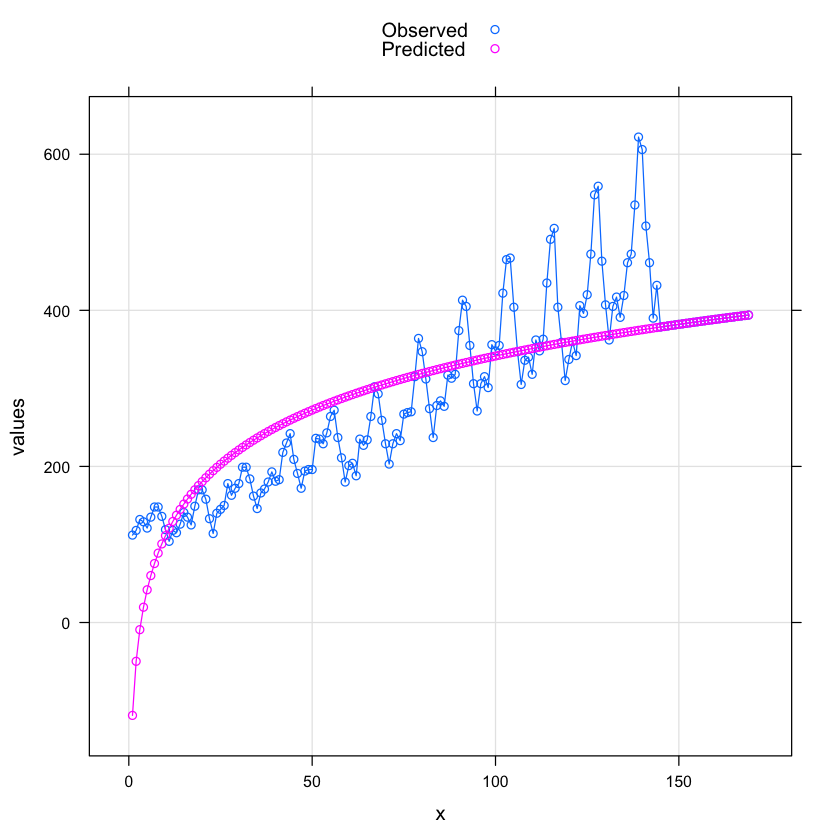

In [13]:
require("lattice")
g1 <- xyplot(values ~ x, data = res, group = ind, auto.key = TRUE, grid = TRUE,
             type=c("p","l"))

library(gridExtra)
grid.arrange(g1, nrow = 1)